# Do open businesses have more reviews than closed businesses?

In [1]:
import pandas as pd
import seaborn as sb
sb.set_theme()

In [2]:
businesses = pd.read_json("../datasets/yelp_academic_dataset_business.json", lines=True)

In [3]:
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
sentiments = pd.read_csv("../datasets/reviews_id_with_sentiment.csv")

In [5]:
sentiments.head()

,review_id,business_id,sentiment_value
0,5teG7qQ0oxQNRhXTkTV-AA,Kfaq9cuyeXHkzWwL39jUWw,POSITIVE
1,yhJplqlngFVTFk5W_velmQ,9CRWWbw3iOo4-9FMAO6nKw,POSITIVE
2,Q90M8AHlNxUVL0ii7MAj1w,SJIQFKTW6uUsOo29w9IHxw,POSITIVE
3,FkuvWGHoqveIKmG2JjuEXg,gP_oWJykA2RocIs_GurKWQ,POSITIVE
4,P7zB0L55i7zwFt3vjAa8lw,gJSNa1bxwtY0dm1t-dh38w,NEGATIVE


In [6]:
positive_reviews = sentiments[sentiments["sentiment_value"] == "POSITIVE"]
negative_reviews = sentiments[sentiments["sentiment_value"] == "NEGATIVE"]

In [7]:
positive_review_counts = positive_reviews.groupby('business_id')['review_id'].count().rename("positive_review_counts")

In [8]:
negative_review_counts = negative_reviews.groupby('business_id')['review_id'].count().rename("negative_review_counts")

In [9]:
positive_review_counts

business_id
---kPU91CF4Lq2-WlRu9Lw    6
--9osgUCSDUWUkoTLdvYhQ    2
--O3ip9NpXTKD4oBS1pY2A    3
--epgcb7xHGuJ-4PUeSLAw    1
--hF_3v1JmU9nlu4zfXJ8Q    7
                         ..
zzQWjZ_1Dr7kkDYlk17qRw    2
zzXDi0Pdv0s84M-oQaIa_g    4
zzbZtgPYZS8sTIWQH6DwEw    1
zziDpuuJw-Km1J4BaGpBKA    1
zzjFdJwXuxBOGe9JeY_EMw    1
Name: positive_review_counts, Length: 27741, dtype: int64

In [10]:
negative_review_counts

business_id
--FcbSxK1AoEtEAxOgBaCw    1
--N9yp3ZWqQIm7DqKRvorg    1
--S43ruInmIsGrnnkmavRw    1
--SJXpAa0E-GCp2smaHf0A    1
--eBbs3HpZYIym5pEw8Qdw    1
                         ..
zymvTQ12tRy3bzmP4tPgOg    6
zzIF9qp2UoHN48EeZH_IDg    1
zzUxvYE-8Fj_dWqsPcagNg    1
zzXRdzrVhfNWPHD2MeyWeA    1
zzbZtgPYZS8sTIWQH6DwEw    1
Name: negative_review_counts, Length: 21274, dtype: int64

In [11]:
businesses = pd.merge(businesses, negative_review_counts, on="business_id")
businesses = pd.merge(businesses, positive_review_counts, on="business_id")

In [12]:
businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,negative_review_counts,positive_review_counts
0,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",1,3
1,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250,39.904320,-86.053080,4.0,20,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Steakhouses, Asian Fusion, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,1
2,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Italian","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",6,2
3,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'...",2,2
4,7PDi_iyik3jraDAzWwwR4Q,Chase JP Morgan Bank Credit Card Services,,Wilmington,DE,19850,39.749361,-75.643331,1.5,111,1,None,"Banks & Credit Unions, Financial Services",None,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,fWeWzB9STxcX40AgSEQVcw,Arizona-Sonora Desert Museum,2021 N Kinney Rd,Tucson,AZ,85743,32.243733,-111.166815,4.5,448,1,"{'GoodForKids': 'True', 'BusinessParking': '{'...","Parks, Zoos, Active Life, Botanical Gardens, M...","{'Monday': '8:30-17:0', 'Tuesday': '8:30-17:0'...",1,6
9633,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,27.770872,-82.643069,4.5,38,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R...","{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:...",2,18
9634,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,1,"{'NoiseLevel': 'u'average'', 'RestaurantsTakeO...","Restaurants, Specialty Food, Food, Sandwiches,...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",1,1
9635,AM7O0cwkxm6w_e0Q7-f9FQ,Starbucks,8817 S US-31,Indianapolis,IN,46227,39.638245,-86.128069,4.0,29,1,"{'RestaurantsPriceRange2': '1', 'Caters': 'Fal...","Food, Coffee & Tea","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...",1,2


In [13]:
businesses["total_review_count"] = businesses["negative_review_counts"] + businesses["positive_review_counts"]

In [14]:
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,negative_review_counts,positive_review_counts,total_review_count
0,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",1,3,4
1,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250,39.904320,-86.053080,4.0,20,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Steakhouses, Asian Fusion, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,1,2
2,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Italian","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",6,2,8
3,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'...",2,2,4
4,7PDi_iyik3jraDAzWwwR4Q,Chase JP Morgan Bank Credit Card Services,,Wilmington,DE,19850,39.749361,-75.643331,1.5,111,1,None,"Banks & Credit Unions, Financial Services",None,4,1,5


It seems like the businesses that are closed have very few reviews compared to the open businesses, hence there is a correlation between number of reviews and the open state of the business

<Axes: xlabel='is_open', ylabel='total_review_count'>

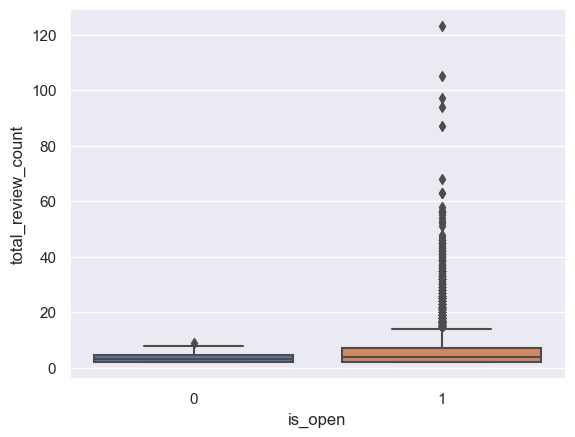

In [15]:
sb.boxplot(data=businesses, x=businesses["is_open"], y=businesses["total_review_count"])

## Verdict
### Do open businesses have more reviews than closed businesses?
There is a relation between total number of reviews and whether a business is open.

### Exporting to CSV

In [16]:
businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,negative_review_counts,positive_review_counts,total_review_count
0,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",1,3,4
1,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250,39.904320,-86.053080,4.0,20,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Steakhouses, Asian Fusion, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,1,2
2,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Italian","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",6,2,8
3,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'...",2,2,4
4,7PDi_iyik3jraDAzWwwR4Q,Chase JP Morgan Bank Credit Card Services,,Wilmington,DE,19850,39.749361,-75.643331,1.5,111,1,None,"Banks & Credit Unions, Financial Services",None,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,fWeWzB9STxcX40AgSEQVcw,Arizona-Sonora Desert Museum,2021 N Kinney Rd,Tucson,AZ,85743,32.243733,-111.166815,4.5,448,1,"{'GoodForKids': 'True', 'BusinessParking': '{'...","Parks, Zoos, Active Life, Botanical Gardens, M...","{'Monday': '8:30-17:0', 'Tuesday': '8:30-17:0'...",1,6,7
9633,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,27.770872,-82.643069,4.5,38,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R...","{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:...",2,18,20
9634,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,1,"{'NoiseLevel': 'u'average'', 'RestaurantsTakeO...","Restaurants, Specialty Food, Food, Sandwiches,...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",1,1,2
9635,AM7O0cwkxm6w_e0Q7-f9FQ,Starbucks,8817 S US-31,Indianapolis,IN,46227,39.638245,-86.128069,4.0,29,1,"{'RestaurantsPriceRange2': '1', 'Caters': 'Fal...","Food, Coffee & Tea","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...",1,2,3


In [17]:
businesses_with_total_review_count = businesses[["business_id" ,"total_review_count"]].copy()

In [18]:
businesses_with_total_review_count

,business_id,total_review_count
0,ROeacJQwBeh05Rqg7F6TCg,4
1,kfNv-JZpuN6TVNSO6hHdkw,2
2,9OG5YkX1g2GReZM0AskizA,8
3,aPNXGTDkf-4bjhyMBQxqpQ,4
4,7PDi_iyik3jraDAzWwwR4Q,5
...,...,...
9632,fWeWzB9STxcX40AgSEQVcw,7
9633,esBGrrmuZzSiECyRBoKvvA,20
9634,wVxXRFf10zTTAs11nr4xeA,2
9635,AM7O0cwkxm6w_e0Q7-f9FQ,3


In [19]:
businesses_with_total_review_count.to_csv("businesses_with_total_review_count.csv", index=False)